In [57]:
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
enrolment_monthly_df=pd.read_csv("../final_dataset/enrolment_monthly.csv")

In [59]:
demographic_monthly_df=pd.read_csv("../final_dataset/demographic_monthly.csv")

In [60]:
national_enrolment_trend=(enrolment_monthly_df.groupby("year_month",as_index=False)["total_enrolments"].sum())

In [61]:
national_demographic_trend=(demographic_monthly_df.groupby("year_month",as_index=False)["total_demographic_updates"].sum())

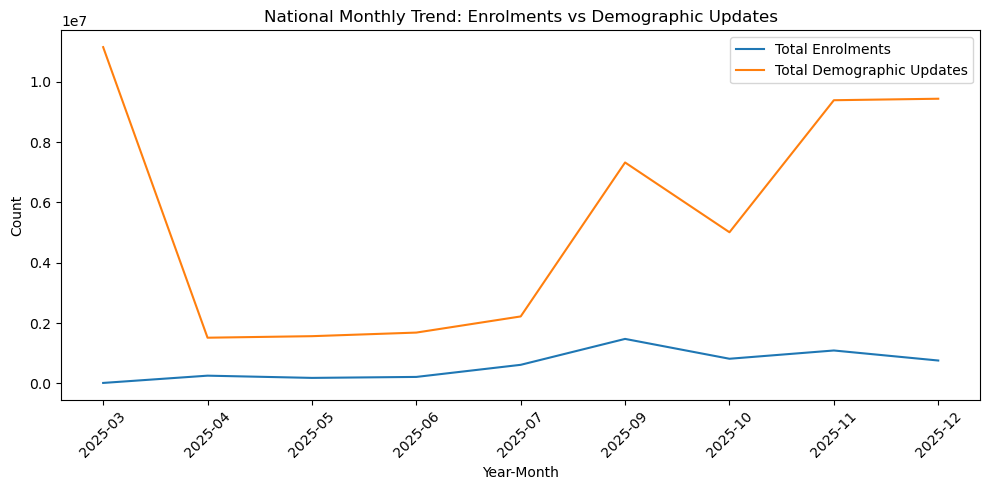

In [62]:
plt.figure(figsize=(10,5))
plt.plot(national_enrolment_trend["year_month"],
         national_enrolment_trend["total_enrolments"],
         label="Total Enrolments"
)
plt.plot(
  national_demographic_trend["year_month"],
  national_demographic_trend["total_demographic_updates"],
  label="Total Demographic Updates"
)
plt.xlabel("Year-Month")
plt.ylabel("Count")
plt.title("National Monthly Trend: Enrolments vs Demographic Updates")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [63]:
top_states=(
  enrolment_monthly_df
  .groupby("state_final")["total_enrolments"]
  .sum()
  .sort_values(ascending=False)
  .head(5)
  .index
)

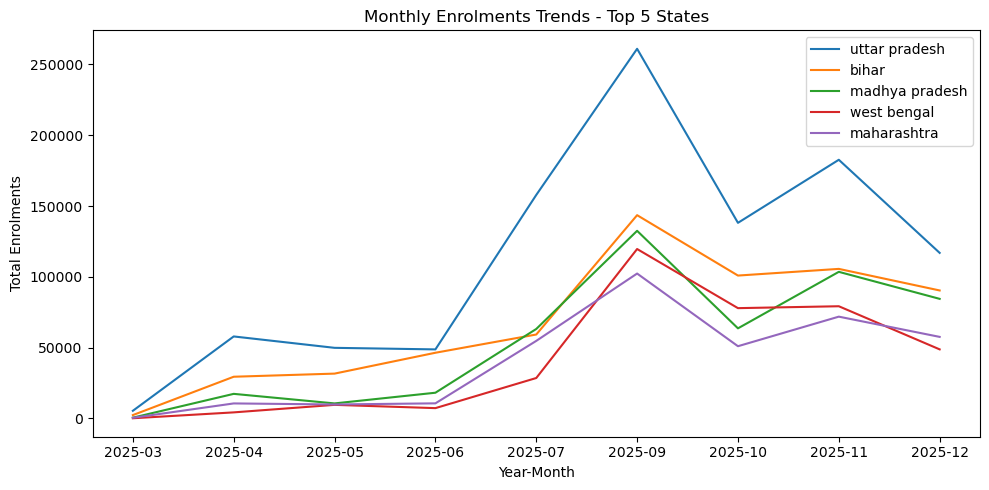

In [64]:
plt.figure(figsize=(10,5))
for state in top_states:
  state_data=enrolment_monthly_df[enrolment_monthly_df["state_final"]==state].groupby("year_month")["total_enrolments"].sum()

  plt.plot(state_data.index,state_data.values,label=state)

plt.xlabel("Year-Month")
plt.ylabel("Total Enrolments")
plt.title("Monthly Enrolments Trends - Top 5 States")
plt.legend()
plt.tight_layout()
plt.show()



In [65]:
state_enrolment_totals=(enrolment_monthly_df.groupby("state_final", as_index=False)["total_enrolments"].sum().sort_values("total_enrolments",ascending=False))

In [66]:
state_demographic_totals=(
  demographic_monthly_df.groupby("state_final",as_index=False)["total_demographic_updates"].sum().sort_values("total_demographic_updates",ascending=False)
)

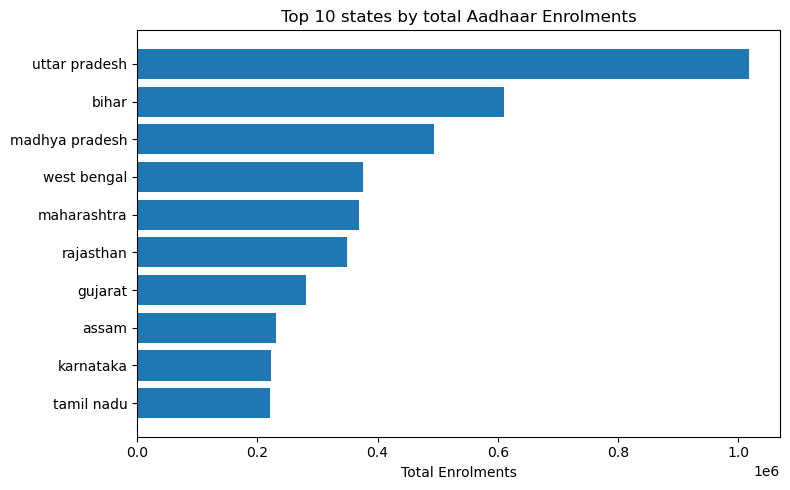

In [67]:
top10_enrolment_states=state_enrolment_totals.head(10)
plt.figure(figsize=(8,5))
plt.barh(
  top10_enrolment_states["state_final"],
  top10_enrolment_states["total_enrolments"]
)
plt.xlabel("Total Enrolments")
plt.title("Top 10 states by total Aadhaar Enrolments")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

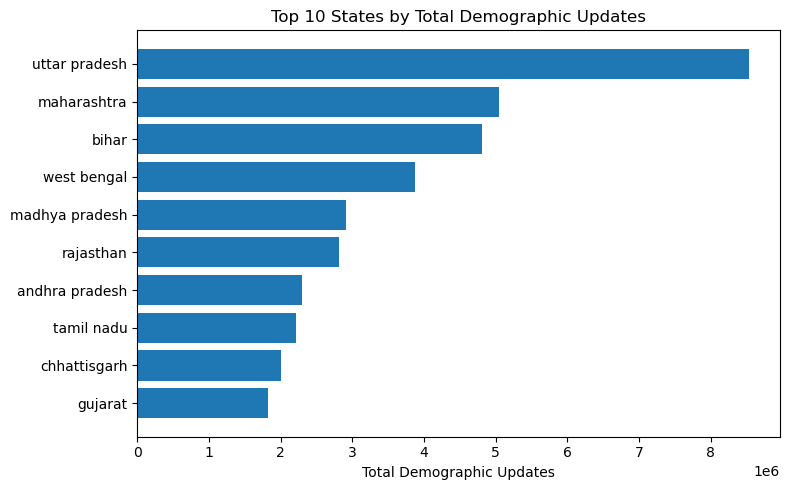

In [68]:
top10_demographic_states=state_demographic_totals.head(10)
plt.figure(figsize=(8,5))
plt.barh(
  top10_demographic_states["state_final"],
  top10_demographic_states["total_demographic_updates"]
)
plt.xlabel("Total Demographic Updates")
plt.title("Top 10 States by Total Demographic Updates")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [69]:
district_enrolment_totals=(
  enrolment_monthly_df.groupby(["state_final","district_norm"],as_index=False)["total_enrolments"].sum().sort_values("total_enrolments",ascending=False)
)

In [70]:
top10_districts=district_enrolment_totals.head(10).copy()

top10_districts["label"]=(
  top10_districts["district_norm"]+", "+top10_districts["state_final"]
)


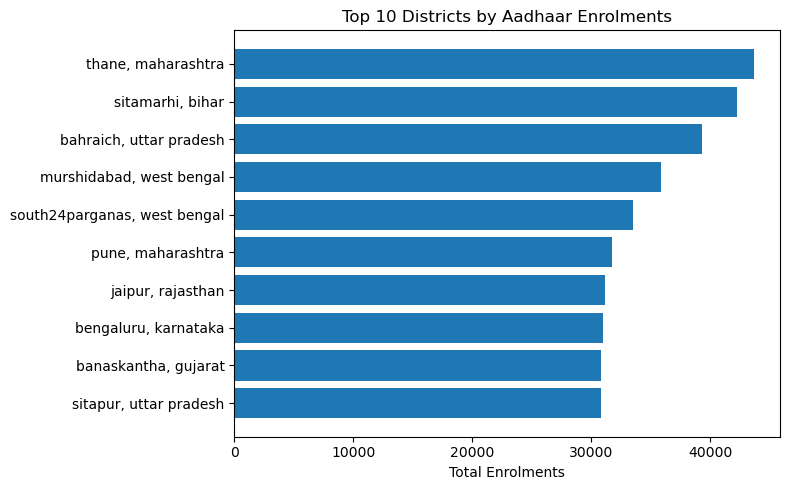

In [71]:
plt.figure(figsize=(8,5))
plt.barh(
  top10_districts["label"],
  top10_districts["total_enrolments"]
)
plt.xlabel("Total Enrolments")
plt.title("Top 10 Districts by Aadhaar Enrolments")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [72]:
national_enrolment_age=enrolment_monthly_df[[
  "age_0_5","age_5_17","age_18_greater"
]].sum().reset_index()
national_enrolment_age.columns=["age_group","total_enrolments"]

In [73]:
national_demo_age=demographic_monthly_df[["demo_age_5_17","demo_age_17_"]].sum().reset_index()
national_demo_age.columns=["age_group","total_updates"]

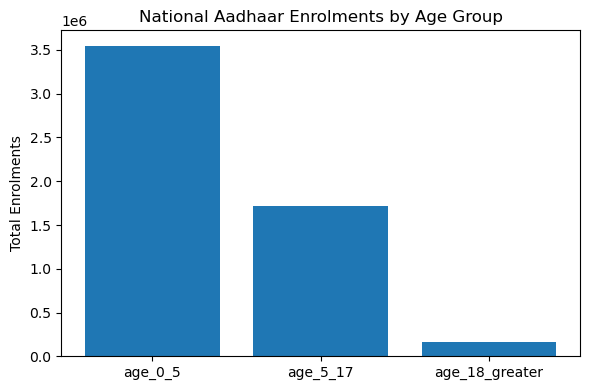

In [74]:
plt.figure(figsize=(6,4))
plt.bar(
  national_enrolment_age["age_group"],
  national_enrolment_age["total_enrolments"]
)
plt.title("National Aadhaar Enrolments by Age Group")
plt.ylabel("Total Enrolments")
plt.tight_layout()
plt.show()


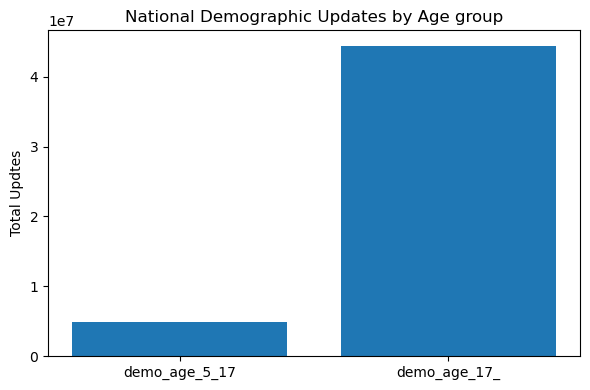

In [75]:
plt.figure(figsize=(6,4))
plt.bar(
  national_demo_age["age_group"],
  national_demo_age["total_updates"]
)
plt.title("National Demographic Updates by Age group")
plt.ylabel("Total Updtes")
plt.tight_layout()
plt.show()



In [76]:
state_enrolment_age=(
  enrolment_monthly_df.groupby("state_final")[["age_0_5","age_5_17","age_18_greater"]].sum()
)

In [77]:
top_states=(
  enrolment_monthly_df.groupby("state_final")["total_enrolments"].sum().sort_values(ascending=False).head(5).index
)

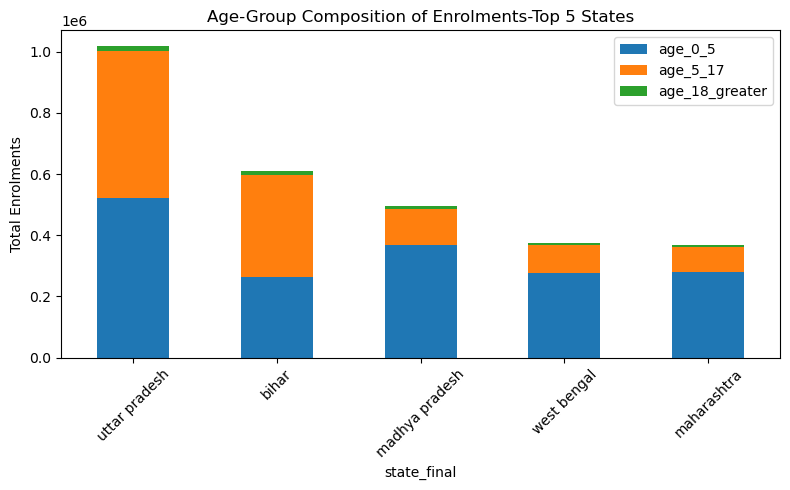

In [78]:
state_enrolment_age.loc[top_states].plot(
  kind="bar",
  stacked=True,
  figsize=(8,5)
)
plt.title("Age-Group Composition of Enrolments-Top 5 States")
plt.ylabel("Total Enrolments")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [79]:
enrolment_agg=pd.read_csv("../final_dataset/enrolment_aggregated.csv",parse_dates=["date"])

In [80]:
demographic_agg=pd.read_csv("../final_dataset/demographic_aggregated.csv",parse_dates=["date"])

In [81]:
district_enrolments=(
  enrolment_agg.groupby(["state_final","district_norm"],as_index=False)["total_enrolments"].sum()
)

In [82]:
district_updates=(
  demographic_agg.groupby(["state_final","district_norm"],as_index=False)[["demo_age_5_17","demo_age_17_"]].sum()
)
district_updates["total_updates"]=(
  district_updates["demo_age_5_17"]+district_updates["demo_age_17_"]
)

In [83]:
district_pressure=pd.merge(
  district_enrolments,
  district_updates[["state_final","district_norm","total_updates"]],
  on=["state_final","district_norm"],
  how="inner"
)

In [84]:
district_pressure["update_enrolment_ratio"]=(
  district_pressure["total_updates"]/district_pressure["total_enrolments"]
)

In [85]:
district_pressure_sorted=district_pressure[district_pressure["total_enrolments"]>0]

In [86]:
district_pressure_sorted=district_pressure.sort_values(
  "update_enrolment_ratio",ascending=False
)

In [87]:
district_pressure_sorted["label"]=(
  district_pressure_sorted["district_norm"]+", "+district_pressure_sorted["state_final"]
)

In [88]:
district_pressure_sorted.head()

,state_final,district_norm,total_enrolments,total_updates,update_enrolment_ratio,label
540,rajasthan,beawar,1,510,510.0,"beawar, rajasthan"
536,rajasthan,balotra,1,503,503.0,"balotra, rajasthan"
552,rajasthan,didwana-kuchaman,2,720,360.0,"didwana-kuchaman, rajasthan"
570,rajasthan,salumbar,1,213,213.0,"salumbar, rajasthan"
389,maharashtra,ahilyanagar,13,2418,186.0,"ahilyanagar, maharashtra"


In [89]:
district_pressure_sorted=district_pressure_sorted.reset_index(drop=True)

In [90]:
district_pressure_sorted.head()

,state_final,district_norm,total_enrolments,total_updates,update_enrolment_ratio,label
0,rajasthan,beawar,1,510,510.0,"beawar, rajasthan"
1,rajasthan,balotra,1,503,503.0,"balotra, rajasthan"
2,rajasthan,didwana-kuchaman,2,720,360.0,"didwana-kuchaman, rajasthan"
3,rajasthan,salumbar,1,213,213.0,"salumbar, rajasthan"
4,maharashtra,ahilyanagar,13,2418,186.0,"ahilyanagar, maharashtra"


In [91]:
district_pressure_sorted[["total_enrolments","total_updates","update_enrolment_ratio"]].describe()

,total_enrolments,total_updates,update_enrolment_ratio
count,772.000000,772.000000,772.000000
mean,6012.928756,54713.367876,13.089273
std,6625.926358,59605.291094,30.998510
min,1.000000,1.000000,0.001439
25%,1187.250000,11305.000000,6.753349
50%,4047.500000,37689.000000,9.591837
75%,8167.250000,77046.250000,12.569309
max,43688.000000,447253.000000,510.000000


In [92]:
high_risk_districts=district_pressure_sorted[(district_pressure_sorted["total_enrolments"]>=1000)&(district_pressure_sorted["total_updates"]>=10000)&(district_pressure_sorted["update_enrolment_ratio"]>=3)]
                                            

In [93]:
high_risk_districts=high_risk_districts.reset_index(drop=True)

In [94]:
high_risk_districts.shape

(561, 6)

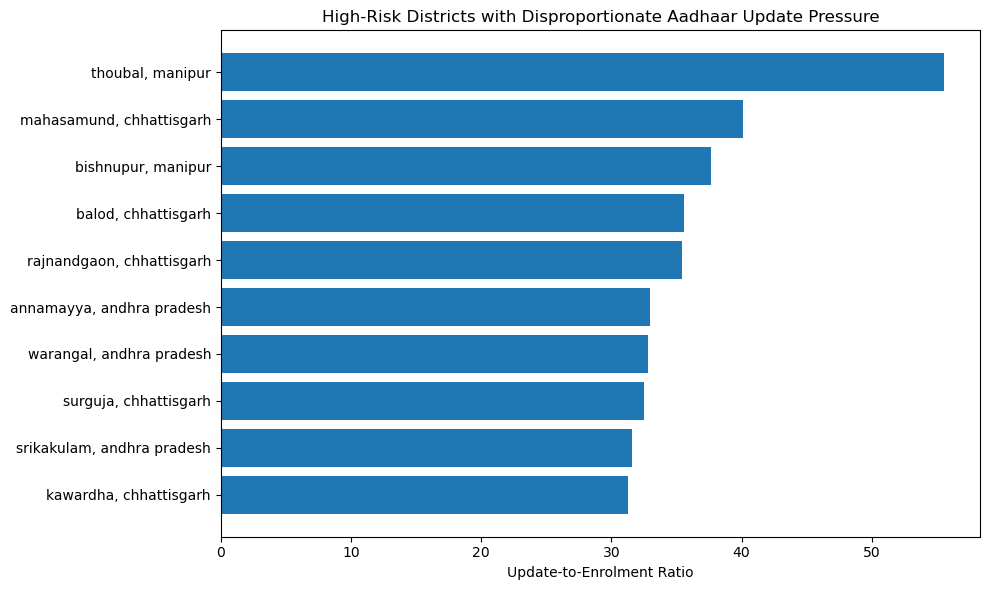

In [95]:
top_risk=high_risk_districts.head(10)
plt.figure(figsize=(10,6))
plt.barh(
  top_risk["label"],
  top_risk["update_enrolment_ratio"]
)
plt.xlabel("Update-to-Enrolment Ratio")
plt.title("High-Risk Districts with Disproportionate Aadhaar Update Pressure")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [96]:
district_lifecycle=district_pressure_sorted.copy()

def classify_lifecycle(r):
    if r<1:
        return "Enrollment-dominant"
    elif r<5:
        return "Balanced"
    else:
        return "Update-dominant"
district_lifecycle["lifecycle_type"] = (
    district_lifecycle["update_enrolment_ratio"]
    .apply(classify_lifecycle)
)
district_lifecycle["lifecycle_type"].value_counts()

lifecycle_type
Update-dominant        664
Balanced                96
Enrollment-dominant     12
Name: count, dtype: int64

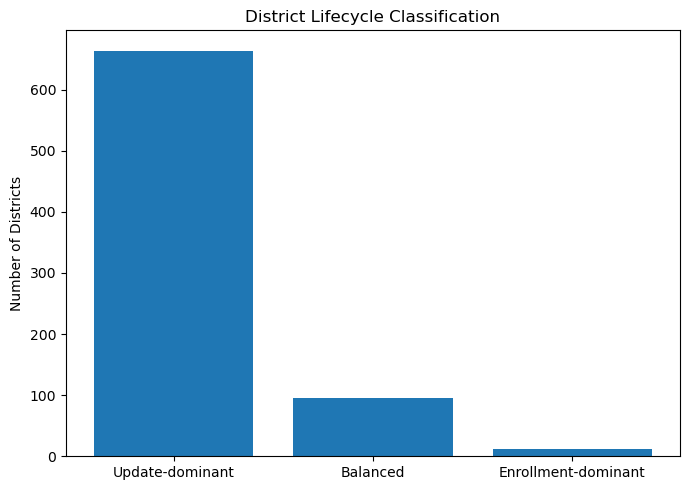

In [97]:
import matplotlib.pyplot as plt
lifecycle_counts = district_lifecycle["lifecycle_type"].value_counts()
plt.figure(figsize=(7,5))
plt.bar(lifecycle_counts.index, lifecycle_counts.values)
plt.title("District Lifecycle Classification")
plt.ylabel("Number of Districts")
plt.tight_layout()
plt.show()

In [98]:
monthly_pressure = (
    enrolment_monthly_df
    .merge(
        demographic_monthly_df,
        on=["year_month", "state_final","district_norm"],
        how="inner"
    )
)
monthly_pressure["total_updates"] = (
    monthly_pressure["demo_age_5_17"] + 
    monthly_pressure["demo_age_17_"]
)

monthly_pressure = monthly_pressure[monthly_pressure["total_enrolments"]>0]
monthly_pressure["monthly_ratio"] = (monthly_pressure["total_updates"]/monthly_pressure["total_enrolments"])
monthly_pressure.head()
monthly_pressure.shape
monthly_pressure["monthly_ratio"].describe()

count    3395.000000
mean       13.188211
std        45.451386
min         0.000594
25%         4.292277
50%         6.767677
75%        11.460175
max      1599.297872
Name: monthly_ratio, dtype: float64

In [99]:
persistent_districts = (
    monthly_pressure
    .groupby(["state_final", "district_norm"])
    .apply(lambda x: (x["monthly_ratio"] >= 3).sum())
    .reset_index(name="high_pressure_months")
)

persistent_districts.sort_values(
    "high_pressure_months", ascending=False
).head(10)

C:\Users\DELL\AppData\Local\Temp\ipykernel_61644\453882866.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x["monthly_ratio"] >= 3).sum())


,state_final,district_norm,high_pressure_months
171,gujarat,kachchh,9
190,haryana,faridabad,9
426,maharashtra,thane,9
738,uttarakhand,dehradun,9
168,gujarat,gandhinagar,8
690,uttar pradesh,ghaziabad,8
680,uttar pradesh,bulandshahr,8
520,punjab,hoshiarpur,8
417,maharashtra,pune,8
625,telangana,hyderabad,8


In [100]:
state_risk_profile = (
    district_pressure_sorted
    .assign(high_risk=lambda x: x["update_enrolment_ratio"]>=3)
    .groupby("state_final")
    .agg(
        total_districts=("district_norm", "count"),
        high_risk_districts=("high_risk", "sum"),
        avg_ratio=("update_enrolment_ratio", "mean")
    )
    .reset_index()
)

state_risk_profile["high_risk_pct"] = (state_risk_profile["high_risk_districts"] / state_risk_profile["total_districts"]) * 100
state_risk_profile.head()

,state_final,total_districts,high_risk_districts,avg_ratio,high_risk_pct
0,Unknown/Invalid,1,0,0.009174,0.000000
1,andaman and nicobar islands,3,3,8.164444,100.000000
2,andhra pradesh,33,32,19.226624,96.969697
3,arunachal pradesh,11,10,9.409396,90.909091
4,assam,30,28,6.557871,93.333333


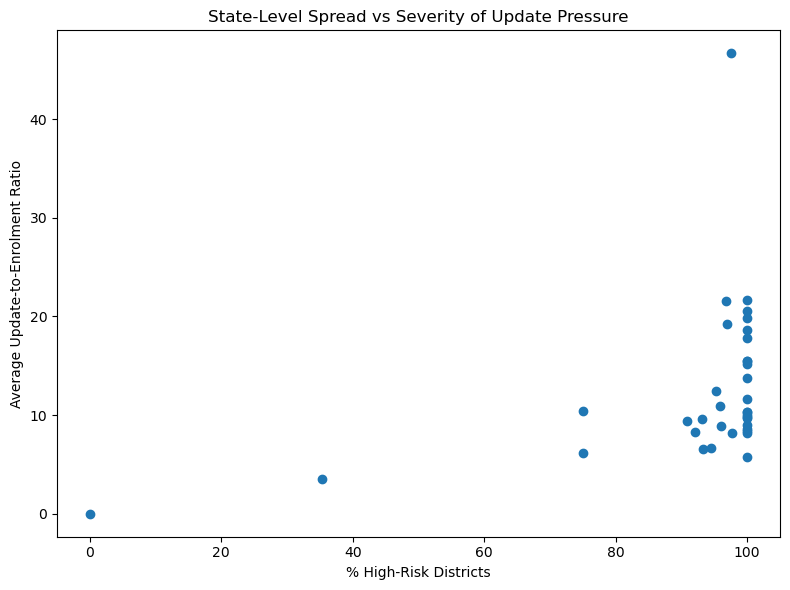

In [101]:
plt.figure(figsize=(8,6))
plt.scatter(
    state_risk_profile["high_risk_pct"],
    state_risk_profile["avg_ratio"]
)
plt.xlabel("% High-Risk Districts")
plt.ylabel("Average Update-to-Enrolment Ratio")
plt.title("State-Level Spread vs Severity of Update Pressure")
plt.tight_layout()
plt.show()

In [103]:
saturation_districts = district_pressure_sorted[
    (district_pressure_sorted["total_enrolments"] < 2000) & 
    (district_pressure_sorted["total_updates"] > 20000)
]
saturation_districts.sort_values("total_updates", ascending=False).head(10)

,state_final,district_norm,total_enrolments,total_updates,update_enrolment_ratio,label
10,chhattisgarh,balod,1678,59734,35.598331,"balod, chhattisgarh"
6,manipur,thoubal,1067,59244,55.523899,"thoubal, manipur"
51,chhattisgarh,dhamtari,1968,44713,22.720020,"dhamtari, chhattisgarh"
9,manipur,bishnupur,1117,42055,37.649955,"bishnupur, manipur"
35,telangana,yadadri.,1586,39872,25.139975,"yadadri., telangana"
74,maharashtra,bhandara,1903,37894,19.912769,"bhandara, maharashtra"
80,telangana,siddipet,1876,35961,19.168977,"siddipet, telangana"
14,andhra pradesh,warangal,1059,34766,32.829084,"warangal, andhra pradesh"
37,haryana,panchkula,1384,34418,24.868497,"panchkula, haryana"
42,telangana,nirmal,1401,33846,24.158458,"nirmal, telangana"


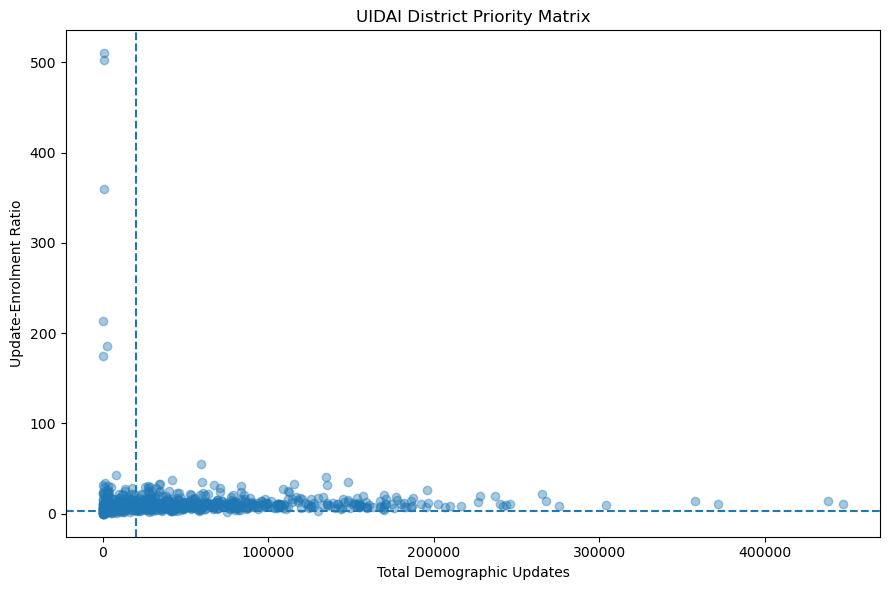

In [104]:
plt.figure(figsize=(9,6))

plt.scatter(
    district_pressure_sorted["total_updates"], 
    district_pressure_sorted["update_enrolment_ratio"],
    alpha=0.4
)
plt.axhline(3, linestyle="--")
plt.axvline(20000, linestyle="--")

plt.xlabel("Total Demographic Updates")
plt.ylabel("Update-Enrolment Ratio")
plt.title("UIDAI District Priority Matrix")
plt.tight_layout()
plt.show()

In [109]:
decision_table = district_pressure_sorted.copy()

decision_table["priority_level"] = "Low"

decision_table.loc[
    (decision_table["total_updates"] >= 20000) &
    (decision_table["update_enrolment_ratio"] >= 8),
    "priority_level"
] = "Immediate Action"

decision_table.loc[
    (decision_table["total_updates"] >= 20000) &
    (decision_table["update_enrolment_ratio"] < 8),
    "priority_level"
] = "Capacity Planning"

decision_table.loc[
    (decision_table["total_updates"] < 20000) &
    (decision_table["update_enrolment_ratio"] >= 8),
    "priority_level"
] = "Monitor"

decision_table[
    ["state_final","district_norm","total_enrolments","total_updates",
     "update_enrolment_ratio","priority_level"]
].head(10)


,state_final,district_norm,total_enrolments,total_updates,update_enrolment_ratio,priority_level
0,rajasthan,beawar,1,510,510.000000,Monitor
1,rajasthan,balotra,1,503,503.000000,Monitor
2,rajasthan,didwana-kuchaman,2,720,360.000000,Monitor
3,rajasthan,salumbar,1,213,213.000000,Monitor
4,maharashtra,ahilyanagar,13,2418,186.000000,Monitor
5,telangana,medchal?malkajgiri,2,350,175.000000,Monitor
6,manipur,thoubal,1067,59244,55.523899,Immediate Action
7,chhattisgarh,sarangarh-bilaigarh,186,8055,43.306452,Monitor
8,chhattisgarh,mahasamund,3361,134887,40.132996,Immediate Action
9,manipur,bishnupur,1117,42055,37.649955,Immediate Action


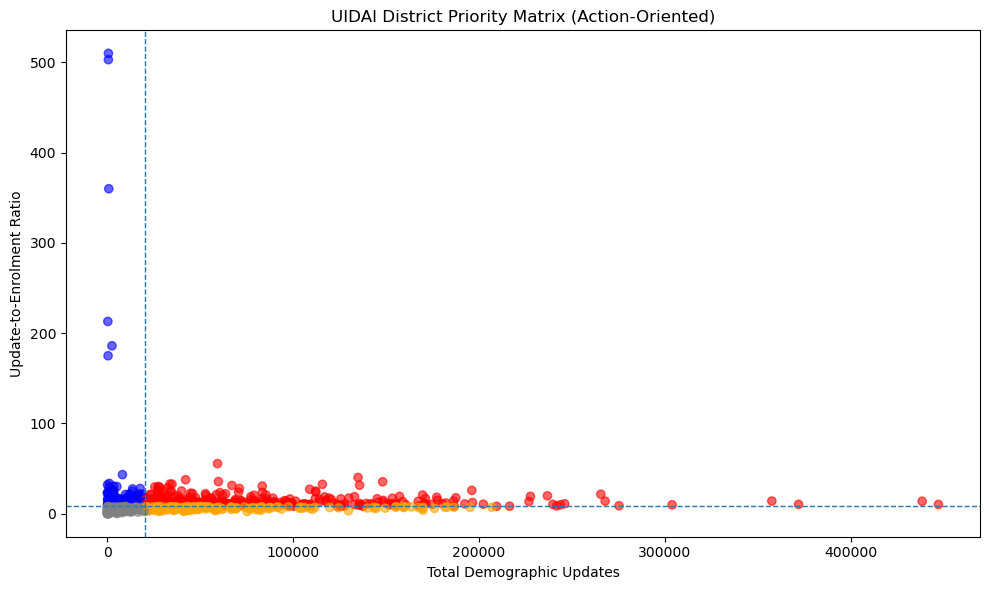

In [110]:
plt.figure(figsize=(10,6))

colors = decision_table["priority_level"].map({
    "Immediate Action": "red",
    "Capacity Planning": "orange",
    "Monitor": "blue",
    "Low": "grey"
})

plt.scatter(
    decision_table["total_updates"],
    decision_table["update_enrolment_ratio"],
    c=colors,
    alpha=0.6
)

plt.axhline(8, linestyle="--", linewidth=1)
plt.axvline(20000, linestyle="--", linewidth=1)

plt.xlabel("Total Demographic Updates")
plt.ylabel("Update-to-Enrolment Ratio")
plt.title("UIDAI District Priority Matrix (Action-Oriented)")

plt.tight_layout()
plt.show()


In [111]:
persistence_summary = (
    monthly_pressure
    .assign(high_pressure=lambda x: x["monthly_ratio"] >= 3)
    .groupby(["state_final","district_norm"])["high_pressure"]
    .sum()
    .reset_index(name="high_pressure_months")
)


In [112]:
top_persistent = persistence_summary.sort_values(
    "high_pressure_months", ascending=False
).head(15)


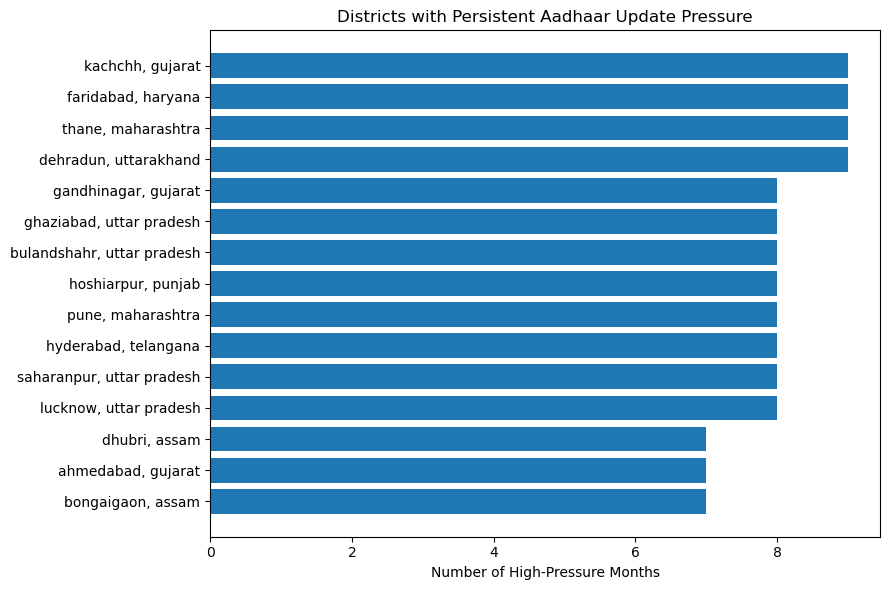

In [113]:
plt.figure(figsize=(9,6))
plt.barh(
    top_persistent["district_norm"] + ", " + top_persistent["state_final"],
    top_persistent["high_pressure_months"]
)

plt.xlabel("Number of High-Pressure Months")
plt.title("Districts with Persistent Aadhaar Update Pressure")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [114]:
decision_table.to_csv(
    "../final_dataset/uidai_district_priority_table.csv",
    index=False
)

top_persistent.to_csv(
    "../final_dataset/persistent_high_pressure_districts.csv",
    index=False
)
